In [1]:
#importing libraries
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

### Preprocessing timestamps data

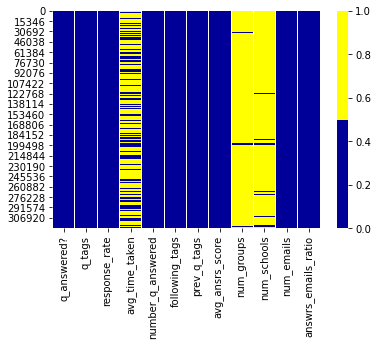

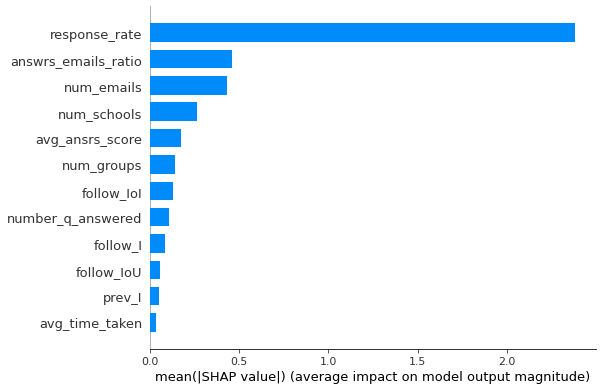

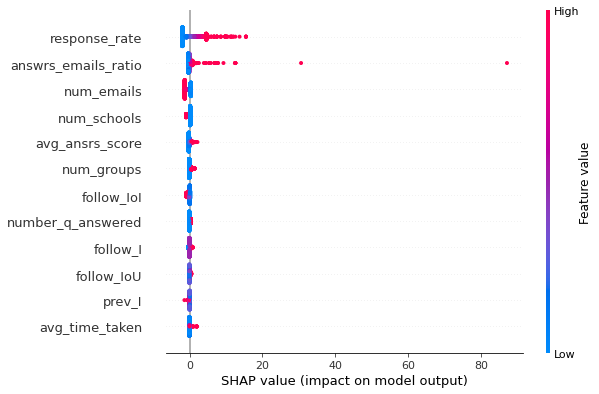

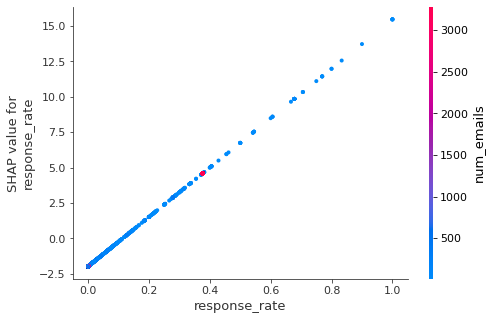

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
238/238 [==============================] - 0s 915us/step - loss: 2.1850 - accuracy: 0.7589
Epoch 2/100
238/238 [==============================] - 0s 896us/step - loss: 0.6354 - accuracy: 0.7823
Epoch 3/100
238/238 [=============================

238/238 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8642
Epoch 73/100
238/238 [==============================] - 0s 952us/step - loss: 0.3156 - accuracy: 0.8642
Epoch 74/100
238/238 [==============================] - 0s 898us/step - loss: 0.3149 - accuracy: 0.8638
Epoch 75/100
238/238 [==============================] - 0s 1ms/step - loss: 0.3161 - accuracy: 0.8649
Epoch 76/100
238/238 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8637
Epoch 77/100
238/238 [==============================] - 0s 942us/step - loss: 0.3135 - accuracy: 0.8642
Epoch 78/100
238/238 [==============================] - 0s 924us/step - loss: 0.3162 - accuracy: 0.8643
Epoch 79/100
238/238 [==============================] - 0s 922us/step - loss: 0.3108 - accuracy: 0.8651
Epoch 80/100
238/238 [==============================] - 0s 879us/step - loss: 0.3124 - accuracy: 0.8662
Epoch 81/100
238/238 [==============================] - 0s 1ms/step - loss: 0.3111 

In [2]:
#running notebook from section 3
%run Datasets_and_Two_Models.ipynb

In [3]:
#question timestamps series
qts_series = pd.to_datetime(questions.questions_date_added) 
qts_series.sort_values(inplace=True)
qts_series

6784    2011-09-27 15:23:17+00:00
7937    2011-09-27 15:23:54+00:00
21892   2011-09-27 15:24:27+00:00
5278    2011-09-27 15:24:52+00:00
19021   2011-09-27 15:26:19+00:00
                   ...           
4342    2019-01-31 19:25:15+00:00
5096    2019-01-31 19:26:27+00:00
124     2019-01-31 19:30:12+00:00
8534    2019-01-31 21:05:44+00:00
9858    2019-01-31 22:32:00+00:00
Name: questions_date_added, Length: 23931, dtype: datetime64[ns, UTC]

In [4]:
month_day_pairs = {1:31,2:28,3:31,4:30,5:31,6:30,
                   7:31,8:31,9:30,10:31,11:30,12:31}

#generating dictionary of dictionary to contain data per year, per month
q_stamps = {2011:{},2012:{},2013:{},2014:{},2015:{},2016:{},2017:{},2018:{},2019:{}}
for year in range(2011,2020):
    
    max_date = '{}-12-31 23:59:59.999'.format(year)
    max_stamp = pd.Timestamp(max_date).tz_localize('UTC')
    
    min_date = '{}-12-31 23:59:59.999'.format(year-1)
    min_stamp = pd.Timestamp(min_date).tz_localize('UTC')
    
    full_year = qts_series[qts_series < max_stamp][qts_series>min_stamp]
    
    for month in range(1,13):
        max_date = '{}-{}-{} 23:59:59.999'.format(year,month,month_day_pairs[month])
        max_stamp = pd.Timestamp(max_date).tz_localize('UTC')
        
        min_date = '{}-{}-{} 00:00:00.00'.format(year,month,1)
        min_stamp = pd.Timestamp(min_date).tz_localize('UTC')
        
        #add list timestamps for the given year and month range
        if list(full_year[full_year < max_stamp][full_year > min_stamp]): 
            q_stamps[year][month] = full_year[full_year < max_stamp][full_year > min_stamp]
        
        #if there are no timestamps in for that month and year, add an empty list
        else:
            q_stamps[year][month] = []

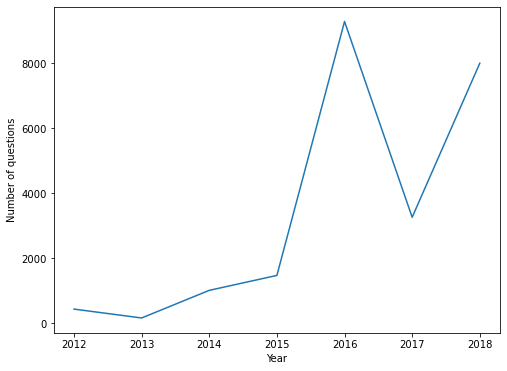

[29, 430, 157, 1007, 1466, 9278, 3255, 7994, 307]


In [5]:
questions_per_year = []
for key in q_stamps:
    q_year = 0
    for month in range(1,13):
        q_year+=len(q_stamps[key][month])
    questions_per_year.append(q_year)
plt.figure(figsize=(8,6))
plt.plot(list(range(2012,2019)),questions_per_year[1:-1])
plt.xlabel('Year')
plt.ylabel('Number of questions')
plt.show()
print(questions_per_year)

### Splitting the data

In [6]:
waiting_times = {2016:{},2017:{},2018:{},2019:{}}
for year in range(2016,2020):
    for month in range(1,13):
        if len(list(q_stamps[year][month]))>1:
            waiting_times[year][month] = pd.Series(np.ediff1d(q_stamps[year][month])).dt.total_seconds()/60
        else:
            waiting_times[year][month] = []

In [7]:
#putting it together by month
wt_recent = {
    1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]
}

for month in range(1,13):
    wt_month = []
    for year in range(2016,2020):
        wt_month += list(waiting_times[year][month])
    wt_recent[month] = wt_month

### Visualizing data for one month

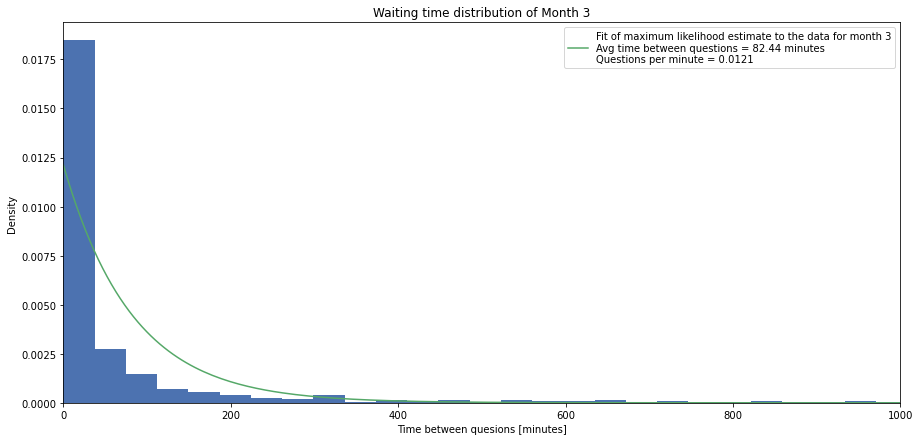

In [8]:
plt.style.use('seaborn-deep')
mo = 3

lambda_ = 1 / np.mean(wt_recent[mo])
distribution = sts.expon(scale=1/lambda_)

# max_bins = 10000
# bins = np.linspace(0, max_bins, 30)
plt.figure(figsize=(15,7))
plt.hist(wt_recent[mo], 70, density=1)
x = np.linspace(0, max(wt_recent[mo]), 500)
y = distribution.pdf(x)
plt.plot(x, y, label = f'Fit of maximum likelihood estimate to the data for month {mo}\nAvg time between questions = {round(1/lambda_,2)} minutes\nQuestions per minute = {round(lambda_,4)}')
plt.xlabel('Time between quesions [minutes]')
plt.ylabel('Density')
plt.title('Waiting time distribution of Month {}'.format(mo))
plt.xlim([0,1000])
plt.legend()
plt.show()

## Likelihood, Prior, Posterior, and Posterior Predictive

In [9]:
def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

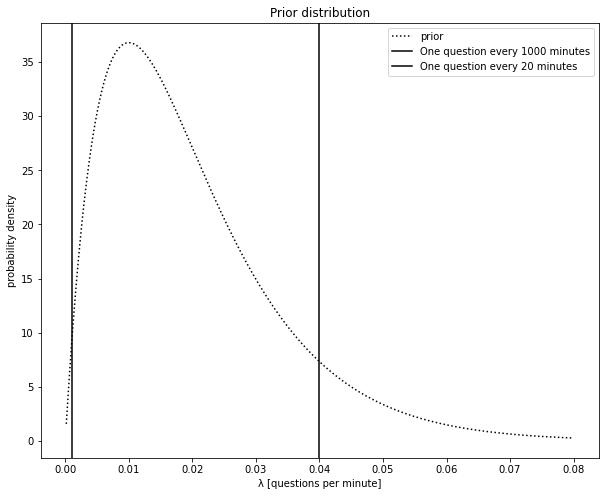

In [10]:
def prior(alpha, beta, lambda_):
    return sts.gamma(alpha, scale=beta).pdf(lambda_)

# PLOT THE PRIOR
alpha = 2
beta = 1/100

lambdas = np.linspace(0, 0.08, 501)[1:]
plt.figure(figsize=(10, 8))
plt.plot(lambdas, prior(alpha,beta,lambdas), color='black', linestyle=':', label='prior')
plt.axvline(x=0.001, color = 'black', label = 'One question every 1000 minutes')
plt.axvline(x=0.04, color = 'black', label = 'One question every 20 minutes')
plt.xlabel('λ [questions per minute]')
plt.ylabel('probability density')
plt.title(f'Prior distribution')
plt.legend()
plt.show()

In [11]:
def posterior(x,alpha,beta,data):
    alpha1 = alpha+len(data)
    beta1 = 1/beta+np.sum(data)
    return sts.gamma(alpha1,scale=1/beta1).pdf(x)

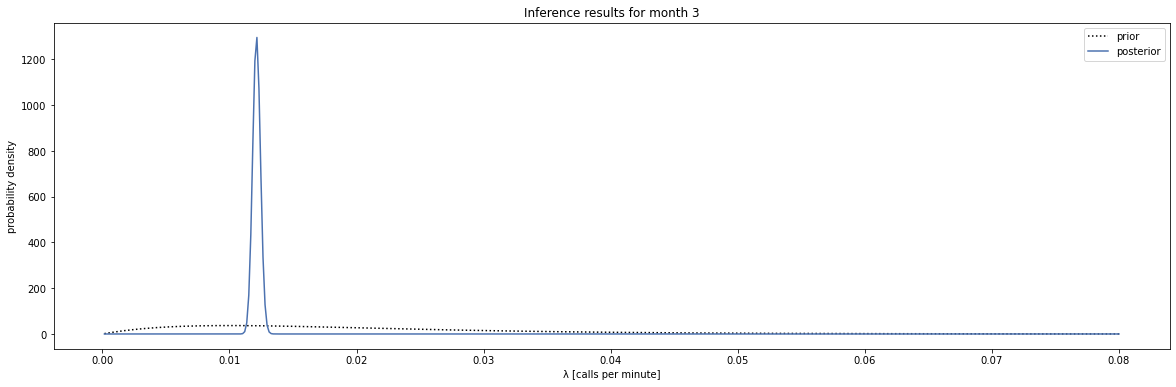

In [12]:
posterior = posterior(lambdas, alpha,beta, wt_recent[mo])

plt.figure(figsize=(20, 6))
plt.plot(lambdas, prior(alpha,beta,lambdas), color='black', linestyle=':', label='prior')
plt.plot(lambdas, posterior, label='posterior')
plt.xlabel('λ [calls per minute]')
plt.ylabel('probability density')
plt.title(f'Inference results for month {mo}')
plt.legend()
plt.show()

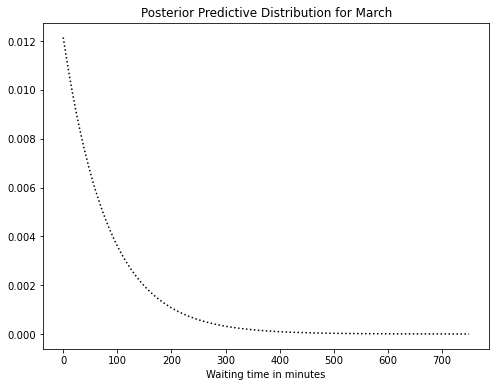

In [13]:
def posterior_predictive(x,alpha,beta,data):
    return sts.lomax.pdf(x, c = alpha+len(data), scale = beta+np.sum(data))

x = np.linspace(0,750,1000)
plt.figure(figsize=(8, 6))
plt.plot(x, posterior_predictive(x,2,1/100,wt_recent[mo]), color='black', linestyle=':', label='posterior predictive')
plt.title('Posterior Predictive Distribution for March')
plt.xlabel('Waiting time in minutes')
plt.show()

In [14]:
alpha_beta_posteriors = {}
for month in range(1,13):
    alpha_beta_posteriors[month] = (len(wt_recent[month])+alpha,np.sum(wt_recent[month])+beta)
    
def post_pred_rvs(month,size=1):
    alpha_, beta_ = alpha_beta_posteriors[month]
    if size == 1:
        return sts.lomax(c=alpha_, scale = beta_).rvs()
    else:
        return sts.lomax(c=alpha_, scale = beta_).rvs(size=size)

#### Gettting the necessary data per professional in the format that can be understood by the model

In [15]:
our_questions = list(full_data['q_tags'])
our_professionals = professionals_dataset[professionals_dataset['following_tags'].notnull()]
our_professionals.loc[:,"num_schools"]=our_professionals["num_schools"].fillna(0)
our_professionals.loc[:,"num_groups"] = our_professionals["num_groups"].fillna(0)
our_professionals.loc[:,"num_emails"] = our_professionals["num_emails"].fillna(0)
our_professionals.loc[:,"avg_time_taken"] = our_professionals["avg_time_taken"].fillna(med)
our_professionals.loc[:,'response_rate'] = our_professionals['response_rate'].fillna(0)
our_professionals.loc[:,'avg_time_taken'] = our_professionals['avg_time_taken'].apply(lambda x: x.total_seconds()/3600 if not type(x) == float else x)
our_professionals.loc[:,'answrs_emails_ratio'] = our_professionals['answrs_emails_ratio'].fillna(0)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
#getting rid of the empty sets of tags
oqs = [x for x in our_questions if type(x)==list]

#### Generating timestamps for one year

In [17]:
#generating timestamps:
timestamps = []
current_time = datetime.datetime(2020, 1, 1, 0, 0, 0, 0)
while current_time.year == 2020:
    wait_time = post_pred_rvs(current_time.month)
    next_ts = current_time + datetime.timedelta(0,wait_time*60)
    current_time = next_ts
    timestamps.append(next_ts)

In [23]:
def Intersection(topics1, topics2):
    """
    Number of topics in common
    """
    if type(topics1) == float or type(topics2) == float:
        return 0
    else:
        return len(set(topics1).intersection(topics2))

In [24]:
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')
import time

threshold = 0.6
def random_answer(x):
    return int(np.random.random()< x)
    
def sample_time(x):
    return max(0,x + sts.norm(0,1).rvs())
    

emails_sent = []
emails_answered = []
time_taken = []
unanswered_questions = 0

start = time.time()

t = 0
for ts in timestamps:  
    random_tags = np.random.choice(oqs)
    def check_intersection(x):
        return bool(len(set(random_tags).intersection(x)))

    new_df = our_professionals[our_professionals.following_tags.apply(check_intersection)]
    new_df["q_tags"] = [random_tags for _ in range(len(new_df))]
    follow_I = new_df.apply(lambda x: Intersection(x.following_tags, x.q_tags), axis=1)
    follow_IoI = new_df.apply(lambda x: IoI(x.following_tags, x.q_tags), axis=1)
    follow_IoU = new_df.apply(lambda x: IoU(x.following_tags, x.q_tags), axis=1)
    prev_I = new_df.apply(lambda x: Intersection(x.prev_q_tags, x.q_tags), axis=1)

    new_df.loc[:,"follow_I"]=follow_I
    new_df.loc[:,"follow_IoI"]=follow_IoI
    new_df.loc[:,"follow_IoU"]=follow_IoU
    new_df.loc[:,"prev_I"]=prev_I
    new_df = new_df.drop(columns = ['professional_id', 'Unnamed: 0_x', 'Unnamed: 0_y',
       'following_tags', 'prev_q_tags', 'q_tags'])
    probas = model.predict(new_df).flatten()
    new_df.loc[:,'probs'] = probas
    to_answer = new_df[new_df.probs>threshold]
    to_answer.loc[:,'answered?'] = to_answer['probs'].apply(random_answer)
    to_answer.loc[:,'time_taken'] = to_answer['avg_time_taken'].apply(sample_time)
    emails_sent.append(len(to_answer))
    emails_answered.append(np.sum(to_answer['answered?']))
    if len(to_answer[to_answer['answered?'] == 1]['time_taken'].values) > 0:
        time_taken.append(min(to_answer[to_answer['answered?'] == 1]['time_taken']))
    else:
        unanswered_questions+=1
    if t%100==0:
        clear_output()
        print(t)
        print(time.time()-start) 
    t+=1

7000
4259.919598817825


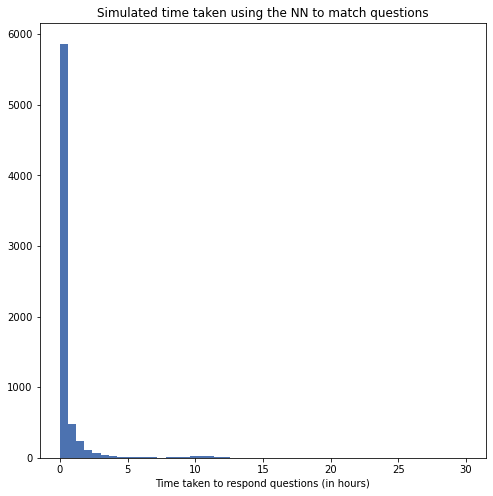

mean =  0.5066217748505724
median =  0.0


In [39]:
plt.figure(figsize=(8,8))
plt.hist(time_taken, 50, range=(0,30))
plt.xlabel('Time taken to respond questions (in hours)')
plt.title('Simulated time taken using the NN to match questions')
plt.show()
print('mean = ',np.mean(time_taken))
print('median = ', np.median(time_taken))

In [19]:
def to_datetime(x):
    return datetime.datetime.strptime(x[:-9], '%Y-%m-%d %H:%M:%S')

In [20]:
q_a = pd.merge(answers,questions,how ='left', left_on = 'question_id', right_on = 'questions_id')
q_a.head(5)
q_a.loc[:,'answers_date_added'] = q_a.answers_date_added.apply(to_datetime)
q_a.loc[:,'questions_date_added'] = q_a.questions_date_added.apply(to_datetime)


In [21]:
q_a = q_a.groupby('question_id')['answers_date_added','questions_date_added'].min()


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


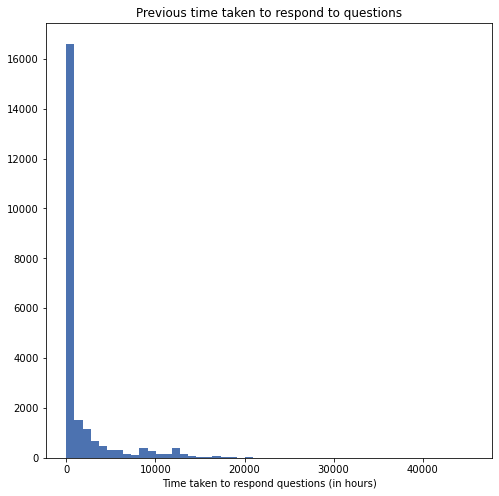

mean =  1581.858000516852
median =  71.805


In [42]:
plt.figure(figsize=(8,8))
time_taken_data = q_a.answers_date_added - q_a.questions_date_added
time_taken_data = [x.total_seconds()/3600 for x in time_taken_data]
plt.hist(time_taken_data,50)
plt.xlabel('Time taken to respond questions (in hours)')
plt.title('Previous time taken to respond to questions')
plt.show()
print('mean = ',np.mean(time_taken_data))
print('median = ',np.median(time_taken_data))

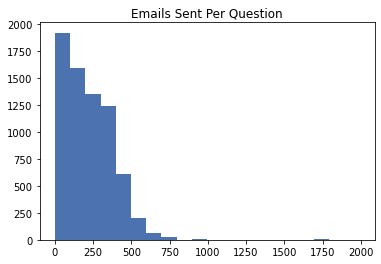

In [45]:
plt.hist(emails_sent, 20)
plt.title('Emails Sent Per Question')
plt.show()

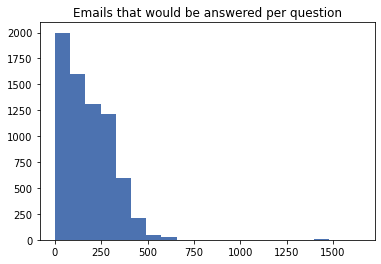

In [46]:
plt.hist(emails_answered, 20)
plt.title('Emails that would be answered per question')
plt.show()

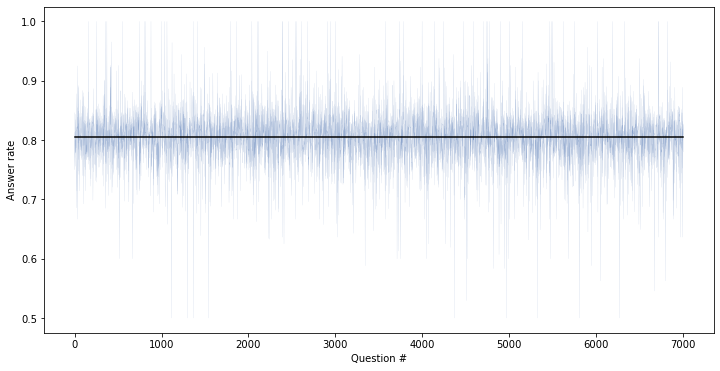

In [72]:
plt.figure(figsize=(12,6))
answer_rates = np.array(emails_answered)/np.array(emails_sent)
plt.plot(list(range(len(answer_rates))),answer_rates, linewidth=0.1, alpha=0.7)
plt.plot([0,len(emails_answered)],[np.mean(answer_rates[~np.isnan(answer_rates)])]*2, color ='black')
plt.xlabel('Question #')
plt.ylabel('Answer rate')
plt.show()